## consider breastcancer data 
# 1.use the idcloumn as row index column and first 150 rows of data with radius_1ean,texture_1ean,per1eter_1ean,area_1ean,s1oothness_1ean as feature columns
# 2.illustrate elbow method for finding the number of clusters
# 3.implement kmeans clustering using the value obtained in step3 and give your conclustions

In [1]:
#step1:importing csv files as creating a dataframe using pandas

In [2]:
import pandas as pd
df=pd.read_csv("breastcancer.csv")
df

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# step2: #remove unwanted rows and colums in a dataframe

In [3]:
x=df.iloc[0:150,2:7]
x

,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
145,11.90,14.65,78.11,432.8,0.11520
146,11.80,16.58,78.99,432.0,0.10910
147,14.95,18.77,97.84,689.5,0.08138
148,14.44,15.18,93.97,640.1,0.09970


# step3:implementing elbow method and importing kMeans library from sk.learn.cluster

In [4]:
from sklearn.cluster import KMeans

In [5]:
twss={}
for k in range(2,12):
    model=KMeans(n_clusters=k,random_state=10).fit(x)
    twss[k]=model.inertia_

In [6]:
twss

{2: 4662408.28044807,
 3: 2581598.722846552,
 4: 1576580.886491634,
 5: 991358.9351994068,
 6: 704861.1811982156,
 7: 480873.77580001135,
 8: 319538.052285981,
 9: 244531.48637898004,
 10: 190938.9098022077,
 11: 161092.217707769}

# step4: creating plot of k vs twss

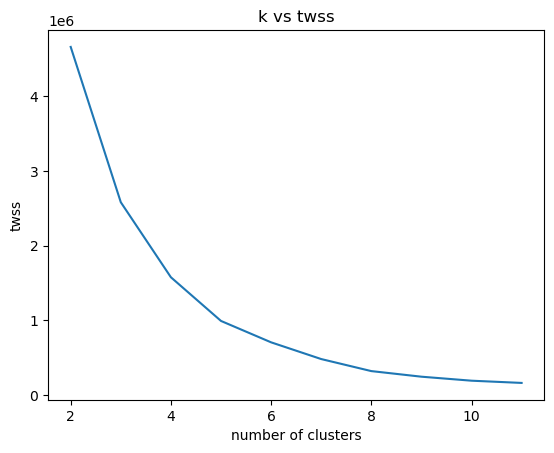

In [7]:
import matplotlib.pyplot as plt
plt.plot(list(twss.keys()),list(twss.values()))
plt.title("k vs twss")
plt.xlabel("number of clusters")
plt.ylabel("twss")
plt.show()

# by syudying the twss values we recommaend the choice k=5

# implementing k-means clustering with k=5

In [8]:
k=5
model=KMeans(n_clusters=k,random_state=10).fit(x)
centers=model.cluster_centers_
centers

array([[1.25993220e+01, 1.83000000e+01, 8.16208475e+01, 4.90089831e+02,
        1.00186441e-01],
       [1.89307143e+01, 2.06671429e+01, 1.25225000e+02, 1.11555357e+03,
        1.00659286e-01],
       [1.53058974e+01, 2.01564103e+01, 1.00690769e+02, 7.28258974e+02,
        1.02560513e-01],
       [2.32250000e+01, 2.19550000e+01, 1.56925000e+02, 1.63800000e+03,
        1.19470000e-01],
       [9.40880000e+00, 1.66445000e+01, 6.03435000e+01, 2.72330000e+02,
        1.02405000e-01]])

In [9]:
for i in range(5):
    print("centeroid for cluster:", i+1, "is", centers[i])

centeroid for cluster: 1 is [1.25993220e+01 1.83000000e+01 8.16208475e+01 4.90089831e+02
 1.00186441e-01]
centeroid for cluster: 2 is [1.89307143e+01 2.06671429e+01 1.25225000e+02 1.11555357e+03
 1.00659286e-01]
centeroid for cluster: 3 is [1.53058974e+01 2.01564103e+01 1.00690769e+02 7.28258974e+02
 1.02560513e-01]
centeroid for cluster: 4 is [2.32250e+01 2.19550e+01 1.56925e+02 1.63800e+03 1.19470e-01]
centeroid for cluster: 5 is [9.40880e+00 1.66445e+01 6.03435e+01 2.72330e+02 1.02405e-01]


# conlustions

# cluster 1:  high impact  on radius_1ean,texture_1ean,per1eter_1ean,area_1ean,s1oothness_1ean 
# cluster 2: low impact on radius_1ean,texture_1ean,per1eter_1ean,area_1ean,s1oothness_1ean 

# cluster 3: medium impact on radius_1ean,texture_1ean,per1eter_1ean,area_1ean,s1oothness_1ean 


# cluster 4: minimum impact on radius_1ean,texture_1ean,per1eter_1ean,area_1ean,s1oothness_1ean 

# cluster 5: medium impact on radius_1ean,texture_1ean,per1eter_1ean,area_1ean,s1oothness_1ean